In [1]:
# 1. Imports
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf  # Importing yfinance
from ydata_synthetic.synthesizers.timeseries import TimeSeriesSynthesizer
from ydata_synthetic.synthesizers import ModelParameters, TrainParameters

# 2. Data Collection
stock_symbol = "AAPL"
data = yf.download(stock_symbol, start="2010-01-01", end="2022-01-01")
df = pd.DataFrame(data)
df = df[["Close"]]
df = df.head(56)
#numerical_cols = ["Open", "High", "Low", "Close", "Adj Close", "Volume"]
numerical_cols = ["Close"]
categorical_cols = []

2023-10-25 00:49:23.253409: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-25 00:49:23.315160: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-25 00:49:24.249832: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


[*********************100%***********************]  1 of 1 completed


In [2]:
df

,Close
Date,
2010-01-04,7.643214
2010-01-05,7.656429
2010-01-06,7.534643
2010-01-07,7.520714
2010-01-08,7.570714
2010-01-11,7.503929
2010-01-12,7.418571
2010-01-13,7.523214
2010-01-14,7.479643


In [3]:
# Defining model and training parameters
model_args = ModelParameters(batch_size=100,
                             lr=0.001,
                             betas=(0.2, 0.9),
                             latent_dim=20,
                             gp_lambda=2,
                             pac=1)
 
train_args = TrainParameters(epochs=400,
                             sequence_length=56,
                             sample_length=7,
                             rounds=1,
                             measurement_cols=["Close"])

extra_rows = df.shape[0] % train_args.sequence_length
if extra_rows > 0:
    df = df[:-extra_rows]

df

,Close
Date,
2010-01-04,7.643214
2010-01-05,7.656429
2010-01-06,7.534643
2010-01-07,7.520714
2010-01-08,7.570714
2010-01-11,7.503929
2010-01-12,7.418571
2010-01-13,7.523214
2010-01-14,7.479643


In [4]:
# Training the DoppelGANger synthesizer
model_dop_gan = TimeSeriesSynthesizer(modelname='doppelganger',model_parameters=model_args)
model_dop_gan.fit(df, train_args, num_cols=numerical_cols, cat_cols=categorical_cols)
 
# Generating new synthetic samples
synth_data = model_dop_gan.sample(n_samples=1)
synth_df = pd.concat(synth_data, axis=0)

Instructions for updating:
Colocations handled automatically by placer.


/root/jupyter/jupyterlab/venv/lib/python3.10/site-packages/ydata_synthetic/synthesizers/timeseries/doppelganger/network.py:13: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  output = tf.compat.v1.layers.dense(


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


/root/jupyter/jupyterlab/venv/lib/python3.10/site-packages/ydata_synthetic/synthesizers/timeseries/doppelganger/network.py:274: UserWarning: `tf.nn.rnn_cell.LSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  cell = tf.compat.v1.nn.rnn_cell.LSTMCell(
2023-10-25 00:49:27.044156: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'zeros/packed/DoppelGANgerGenerator/strided_slice' with dtype int32
	 [[{{node zeros/packed/DoppelGANgerGenerator/strided_slice}}]]
2023-10-25 00:49:27.049048: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a val

2023-10-25 00:49:27.872419: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'zeros/packed/DoppelGANgerGenerator_1/strided_slice' with dtype int32
	 [[{{node zeros/packed/DoppelGANgerGenerator_1/strided_slice}}]]
2023-10-25 00:49:27.877801: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'zeros/packed/DoppelGANgerGenerator_1/strided_slice' with dtype int32
	 [[{{node zeros/packed/DoppelGANgerGenerator_1/strided_slice}}]]
2023-10-25 00:49:27.881868: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVAL

2023-10-25 00:49:28.338301: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'zeros/packed/DoppelGANgerGenerator_2/strided_slice' with dtype int32
	 [[{{node zeros/packed/DoppelGANgerGenerator_2/strided_slice}}]]
2023-10-25 00:49:28.343138: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'zeros/packed/DoppelGANgerGenerator_2/strided_slice' with dtype int32
	 [[{{node zeros/packed/DoppelGANgerGenerator_2/strided_slice}}]]
2023-10-25 00:49:28.347263: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVAL

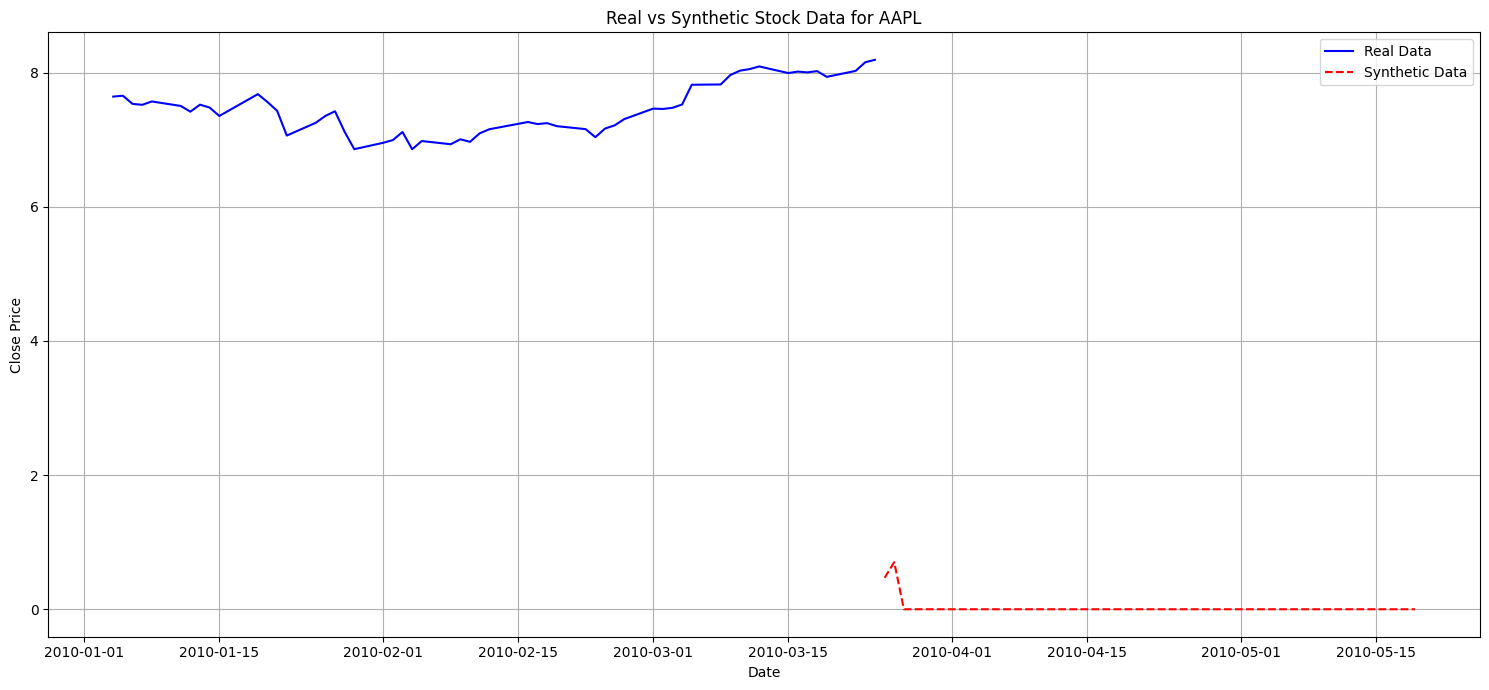

In [8]:
# Plotting real vs synthetic data
plt.figure(figsize=(15, 7))

# Plot real data
plt.plot(df.index, df['Close'], label='Real Data', color='blue')

# Because the synthetic data doesn't have a real timestamp, we'll just make it contiguous with the real data
new_index = pd.date_range(df.index[-1] + pd.Timedelta(days=1), periods=synth_df.shape[0])
synth_df.index = new_index


# Plot synthetic data
plt.plot(synth_df.index, synth_df['Close'], label='Synthetic Data', color='red', linestyle='--')

plt.title(f'Real vs Synthetic Stock Data for {stock_symbol}')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
synth_df
